In [ ]:
from statsmodels.regression import linear_model as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm2
from sklearn.metrics import r2_score
import scipy

In [ ]:
import os
import pingouin

#**Association of Microstructural white matter and personality traits based on Human connectome project dataset**

In [ ]:
csvfile = sorted(os.listdir())[1]
df = pd.read_csv(csvfile, sep =  '\t', index_col = 0)
col =df.columns
df[col[:]].head()

,tract,tags,number of tracts,mean length(mm),span(mm),curl,elongation,diameter(mm),volume(mm^3),trunk volume(mm^3),branch volume(mm^3),total surface area(mm^2),total radius of end regions(mm),total area of end regions(mm^2),irregularity,area of end region 1(mm^2),radius of end region 1(mm),irregularity of end region 1,area of end region 2(mm^2),radius of end region 2(mm),irregularity of end region 2,qa,nqa,dti_fa,md,ad,rd,gfa,iso,rdi,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,Arcuate_Fasciculus_L,dsi-studio-atk,15410.0,128.685,34.9171,3.68544,7.31386,17.5946,31288.0,27278.0,4010.0,60490.0,25.8050,5974.0,8.50406,4194.0,15.5507,0.181143,1780.0,10.25440,0.185587,0.256980,0.283087,0.393075,0.561520,0.805159,0.439618,0.129344,0.399504,0.379680,0.253480,0.035232,0.0,51488_81352,Q1,Q01,F,1,26-30,27,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,Arcuate_Fasciculus_L,dsi-studio-atk,18813.0,120.789,35.9272,3.36205,6.04143,19.9934,37922.0,37293.0,629.0,61596.0,24.1617,7006.0,8.11874,3796.0,14.0523,0.163425,3210.0,10.10940,0.100022,0.226609,0.277610,0.392587,0.528972,0.760296,0.413328,0.122692,0.373097,0.351102,0.232266,0.031265,0.0,51730_81594,Q3,Q03,M,2,31-35,33,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,Arcuate_Fasciculus_L,dsi-studio-atk,16668.0,121.980,32.3953,3.76535,6.26146,19.4810,36358.0,30980.0,5378.0,61361.0,22.9751,6082.0,8.21947,3049.0,13.0326,0.175007,3033.0,9.94253,0.102393,0.279609,0.314404,0.402832,0.532722,0.771320,0.413631,0.126939,0.444134,0.419247,0.278296,0.037951,0.0,51969_81833,S500,Q06,M,2,22-25,22,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,Arcuate_Fasciculus_L,dsi-studio-atk,18673.0,130.061,26.5519,4.89837,7.05933,18.4240,34674.0,23458.0,11216.0,62156.0,25.2128,6711.0,8.25663,3541.0,15.9813,0.226593,3170.0,9.23147,0.084456,0.261298,0.267556,0.400733,0.533603,0.771390,0.414480,0.127738,0.409696,0.389229,0.256815,0.034314,0.0,51679_81543,S500,Q06,F,1,26-30,26,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,Arcuate_Fasciculus_L,dsi-studio-atk,15044.0,123.999,34.9483,3.54807,6.58395,18.8335,34544.0,30769.0,3775.0,62686.0,24.1338,5758.0,8.54417,3177.0,15.0386,0.223638,2581.0,9.09521,0.100690,0.207193,0.272966,0.400221,0.563829,0.814448,0.438605,0.132035,0.313050,0.297991,0.199089,0.027787,0.0,56077_85897,S900,Q10,M,2,26-30,30,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [ ]:
df[col[30:]].head()

,nrdi02L,nrdi04L,nrdi06L,Family_ID,Release,Acquisition,Gender,Gender.1,Age,Age_in_Yrs,Handedness,NEOFAC_A,NEOFAC_O,NEOFAC_C,NEOFAC_N,NEOFAC_E,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,3T_tMRI_PctCompl,fMRI_WM_PctCompl,fMRI_Gamb_PctCompl,fMRI_Mot_PctCompl,fMRI_Lang_PctCompl,fMRI_Soc_PctCompl,fMRI_Rel_PctCompl,fMRI_Emo_PctCompl,3T_dMRI_Compl,3T_dMRI_PctCompl,dMRI_3T_ReconVrs,fMRI_3T_ReconVrs,7T_Full_MR_Compl,7T_RS-fMRI_Count,7T_RS-fMRI_PctCompl,7T_Full_Task_fMRI,7T_tMRI_PctCompl,fMRI_Movie_Compl,...,NEORAW_31,NEORAW_32,NEORAW_33,NEORAW_34,NEORAW_35,NEORAW_36,NEORAW_37,NEORAW_38,NEORAW_39,NEORAW_40,NEORAW_41,NEORAW_42,NEORAW_43,NEORAW_44,NEORAW_45,NEORAW_46,NEORAW_47,NEORAW_48,NEORAW_49,NEORAW_50,NEORAW_51,NEORAW_52,NEORAW_53,NEORAW_54,NEORAW_55,NEORAW_56,NEORAW_57,NEORAW_58,NEORAW_59,NEORAW_60,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
100307,0.253480,0.035232,0.0,51488_81352,Q1,Q01,F,1,26-30,27,95,37.0,24.0,35.0,15.0,37.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,A,D,A,A,SD,A,N,D,A,D,D,N,D,D,A,A,D,A,A,D,SA,A,SD,D,D,D,D,SD,A,3.6,101.12,86.45,0.0,38.6,71.69,71.76,1.76,0.0,1.76
100408,0.232266,0.031265,0.0,51730_81594,Q3,Q03,M,2,31-35,33,55,33.0,29.0,34.0,15.0,33.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r177,0,0,0,0,0.0,0,...,A,D,D,A,A,SD,A,SD,D,A,D,N,D,N,D,N,A,D,SA,A,D,A,A,N,D,N,D,A,A,A,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101107,0.278296,0.037951,0.0,51969_81833,S500,Q06,M,2,22-25,22,5,28.0,35.0,37.0,12.0,28.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,A,N,D,A,SA,SA,N,N,N,SA,SD,N,D,A,SD,N,A,SD,SA,A,SD,SA,SA,A,D,N,SD,A,D,A,6.8,108.79,97.19,1.0,50.1,134.65,131.38,1.84,0.0,1.84
102311,0.256815,0.034314,0.0,51679_81543,S500,Q06,F,1,26-30,26,10,29.0,34.0,38.0,18.0,27.0,1,1,1,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,1,4,100,1,100.0,1,...,D,A,D,A,SA,D,D,SD,D,SA,SD,A,A,D,SD,D,A,D,A,SA,SD,A,A,N,D,D,D,N,A,SA,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,0.199089,0.027787,0.0,56077_85897,S900,Q10,M,2,26-30,30,50,26.0,39.0,27.0,12.0,27.0,1,2,2,4,100.0,1,100.0,100,100.0,100,100.0,100.0,100.0,100,1,100.0,r227,r227,0,0,0,0,0.0,0,...,N,D,N,A,N,D,N,SD,N,A,D,N,A,N,A,D,N,SD,A,N,SD,A,SA,N,D,SD,A,SA,A,SA,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [ ]:
diff_labels = df.columns[df.columns.tolist().index("qa"):df.columns.tolist().index("rdi") + 1].tolist()
pers_labels = df.columns[df.columns.tolist().index("NEOFAC_A"):df.columns.tolist().index("NEOFAC_E") + 1].tolist()
diff_labels, pers_labels


#same as doing

#diff_labels = ["qa", "nqa", "dti_fa", "md", "ad", "rd", "gfa", "iso","rdi"]
#pers_labels = ["NEOFAC_A","NEOFAC_O", "NEOFAC_C", "NEOFAC_N", "NEOFAC_E"]

(['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi'],
 ['NEOFAC_A', 'NEOFAC_O', 'NEOFAC_C', 'NEOFAC_N', 'NEOFAC_E'])

In [ ]:
!pip install pingouin

     |████████████████████████████████| 225kB 5.5MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.8-cp36-none-any.whl size=221687 sha256=f1dff466ef9cdaa72f65df0cf2cb601fad71bc69bd06011ad3b992f2a83a65b0
  Stored in directory: /root/.cache/pip/wheels/d6/9e/53/f885f73f29cf7c8cac3d8f4b1532bbfef2f5eb543946ac9055
  Created wheel for outdated: filename=outdated-0.2.0-cp36-none-any.whl size=4962 sha256=c7a296bc8d2202a6bd9068a6750a7b6fea351bd97724eb0a5241f0d664ac61a8
  Stored in directory: /root/.cache/pip/wheels/fd/7c/ef/814f514d31197310872b5abf353feb8fef9d67ee658e1e7e39
  Created wheel for littleutils: filename=littleutils-0.2.2-cp36-none-any.whl size=7050 sha256=93b46d849a37bfe55bd739255efb9e0a56983880322c53b8183f89666ec3be73
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin outdated littleutils


## Linear regression

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in pers_labels:
      for l in diff_labels:
        x = fd[s]
        idx = np.where(np.isnan(x))
        y = fd[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

Arcuate_Fasciculus_L.tsv
Arcuate_Fasciculus_R.tsv
Cingulum_Frontal_Parahippocampal_L.tsv
Cingulum_Frontal_Parahippocampal_R.tsv
Cingulum_Frontal_Parietal_L.tsv
Cingulum_Frontal_Parietal_R.tsv
Cingulum_Parahippocampal_L.tsv
Cingulum_Parahippocampal_Parietal_L.tsv
Cingulum_Parahippocampal_Parietal_R.tsv
Cingulum_Parahippocampal_R.tsv
Cingulum_Rarolfactory_L.tsv
Cingulum_Rarolfactory_R.tsv
Corpus_Callosum_Body.tsv
Corpus_Callosum_Forceps_Major.tsv
Corpus_Callosum_Forceps_Minor.tsv
Corpus_Callosum_Tapetum.tsv
Corticobulbar_Tract_L.tsv
Corticopontine_Tract_Frontal_L.tsv
Corticopontine_Tract_Frontal_R.tsv
Corticopontine_Tract_Occipital_L.tsv
Corticopontine_Tract_Occipital_R.tsv
Corticopontine_Tract_Parietal_L.tsv
Corticopontine_Tract_Parietal_R.tsv
Corticospinal_Tract_L.tsv
Corticospinal_Tract_R.tsv
Corticostriatal_Tract_Anterior_L.tsv
Corticostriatal_Tract_Anterior_R.tsv
Corticostriatal_Tract_Posterior_L.tsv
Corticostriatal_Tract_Posterior_R.tsv
Corticostriatal_Tract_Superior_L.tsv
Corticos

In [ ]:
files = np.array(features)[np.array(pval) < 0.0005]
pval.index(min(pval))

409

In [ ]:
pval[425]

0.00043917757328587966

In [ ]:
features[425]

['Cingulum_Parahippocampal_R.tsv', 'ad', 'NEOFAC_A']

In [ ]:
len(files)

2

R2:  2.8232571893090586 %
Slope coeff and pvalue:  5.402531341143795 0.0004391775732858818


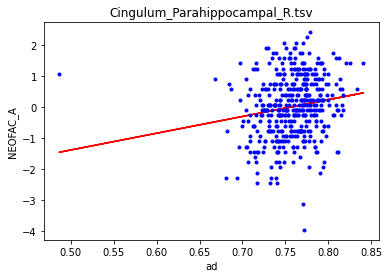

R2:  2.7982672437806055 %
Slope coeff and pvalue:  5.132255005556048 0.0004660759918897445


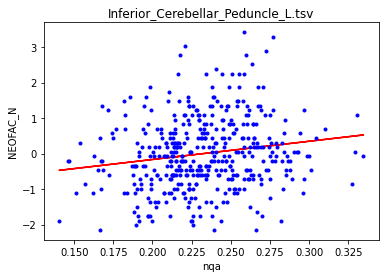

In [ ]:
for r in range(len(files)):
  f = files[r][0]
  l = files[r][1]
  s = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = fd[s]
  y = fd[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  #x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()

In [ ]:
ls.params[1]

0.0007059810185391643

In [ ]:
np.corrcoef(np.log(x),np.log(y))[0,1]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2449: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


nan

In [ ]:
scipy.stats.spearmanr(x,y)

SpearmanrResult(correlation=0.17105477913272318, pvalue=0.0003440321880195163)

In [ ]:
np.corrcoef(x,y)[0,1]

In [ ]:
ls.params[1]*np.std(x)/np.std(y)

0.16728022129889186

In [ ]:
ls.params[1]*np.std(x)/np.std(y)

0.1672802212988918

## Taking into account some covariates

In [ ]:
import pingouin

In [ ]:
pvals = []
corrs = []
features = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    #print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in pers_labels:
      for l in diff_labels:
        rs = pingouin.partial_corr(fd,s,l, ["Gender.1", "Age_in_Yrs"])
        corrs.append(rs['r'][0])
        pvals.append(rs['p-val'][0])
        features.append([file,s,l])

In [ ]:
pvals.index(min(pvals))
ins = np.argsort(pvals)[:20]

In [ ]:
rs

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,434,0.118285,"[0.02, 0.21]",0.013991,0.009416,0.013673,1.244,0.694896


In [ ]:
for i in ins:
  print(pvals[i], corrs[i], features[i])

0.001457730280270451 0.1523341212345253 ['Uncinate_Fasciculus_R.tsv', 'NEOFAC_N', 'nqa']
0.002023812740833943 -0.14777896341411367 ['Superior_Longitudinal_Fasciculus1_L.tsv', 'NEOFAC_N', 'rd']
0.002140499833552946 -0.1469880153337125 ['Thalamic_Radiation_Posterior_L.tsv', 'NEOFAC_E', 'nqa']
0.0030927014077332185 0.14169781832492298 ['Superior_Longitudinal_Fasciculus1_L.tsv', 'NEOFAC_N', 'dti_fa']
0.0034450298726943877 0.1401133454404422 ['Optic_Radiation_L.tsv', 'NEOFAC_N', 'nqa']
0.004132590948615899 0.13740443071017935 ['Superior_Cerebellar_Peduncle.tsv', 'NEOFAC_O', 'gfa']
0.004497526696636906 0.14679534143635276 ['Corticopontine_Tract_Occipital_L.tsv', 'NEOFAC_O', 'dti_fa']
0.004749863724029361 -0.13530003323186537 ['Uncinate_Fasciculus_L.tsv', 'NEOFAC_E', 'nqa']
0.005550867641678853 -0.13290992688473802 ['Cingulum_Parahippocampal_Parietal_L.tsv', 'NEOFAC_E', 'nqa']
0.005604586766731508 -0.1327609897918093 ['Cingulum_Parahippocampal_R.tsv', 'NEOFAC_E', 'nqa']
0.005875427307569078 0

In [ ]:
from sklearn.linear_model import LinearRegression

## Multiple Linear Model

In [ ]:
def ordinary_least_squares(X, y):

  """ 
  Function that computes OLS analytically!

  Equivalent to model = LinearRegression() 
  model.fit(X,y) or
  sm.OLS(y,Xc).fit()

  NB: to take into account also an interecept, a constant vector of 1 needs to be included in X.
  then theta_hat will contain both the results for the intercept and the result for the coefficients

  X (ndarray): design matrix of shape (n_samples, n_regressors)
  y (ndarray): vector of measurements of shape (n_samples)
  Returns:
  ndarray: estimated parameter values of shape (n_regressors)
  """


  # Compute theta_hat using OLS
  theta_hat = np.linalg.inv(X.T @ X) @ (X.T @ y)

  return theta_hat



Tract Cingulum_Parahippocampal_R.tsv
Personality tract: NEOFAC_A
11.329899668390564
MSE = 31.58
Personality tract: NEOFAC_O
5.353918494831267
MSE = 34.99
Personality tract: NEOFAC_C
2.8567898141139136
MSE = 31.63
Personality tract: NEOFAC_N
5.819295761783227
MSE = 56.17
Personality tract: NEOFAC_E
6.393574667150248
MSE = 33.06
Tract Inferior_Cerebellar_Peduncle_L.tsv
Personality tract: NEOFAC_A
7.458859613466629
MSE = 32.95
Personality tract: NEOFAC_O
4.259840312599817
MSE = 35.39
Personality tract: NEOFAC_C
2.6977979353469017
MSE = 31.69
Personality tract: NEOFAC_N
5.995081401089508
MSE = 56.07
Personality tract: NEOFAC_E
3.318244948272764
MSE = 34.15


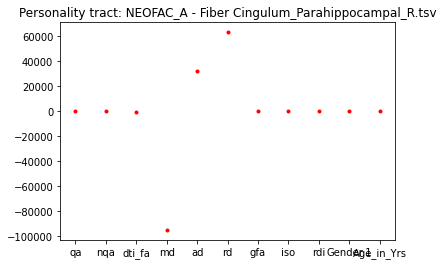

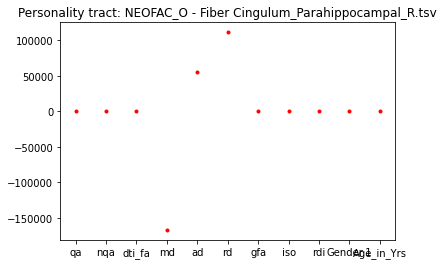

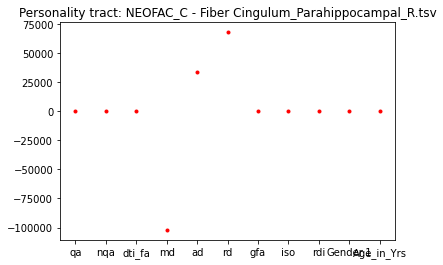

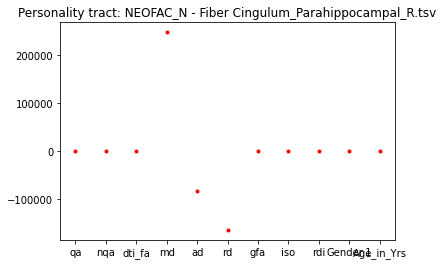

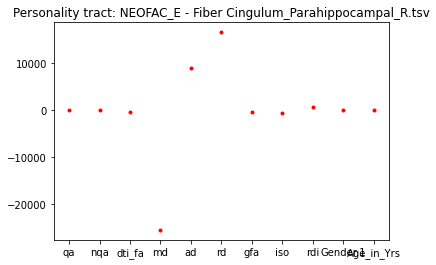

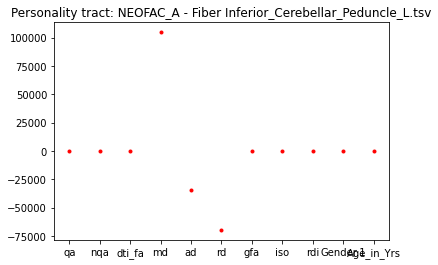

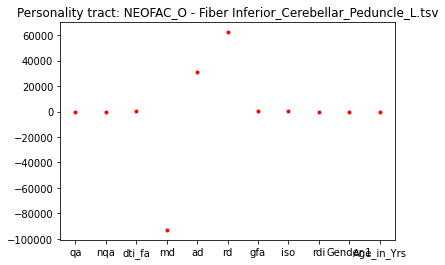

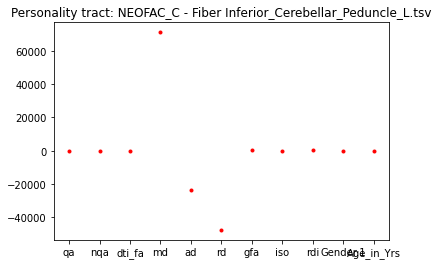

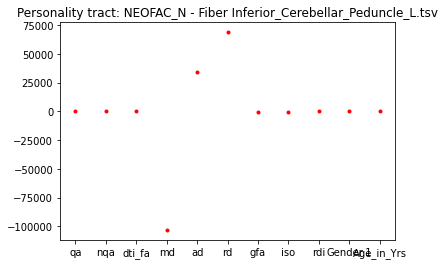

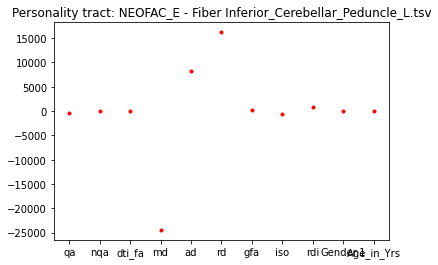

In [ ]:

for r in range(len(files)):
  print('Tract', files[r][0])
  for t in pers_labels:
    f = files[r][0]

    fd = pd.read_csv(f, sep =  '\t', index_col = 0)
    col = diff_labels + ["Gender.1"] + ["Age_in_Yrs"] 
    X = fd[col]
    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))
    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))

    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])

    Xnew2 = sm2.add_constant(Xnew)
    model.fit(Xnew,y)
    theta_hat = ordinary_least_squares(Xnew2, y)

    y_hat = Xnew2 @ theta_hat
    # Compute MSE
    
    print('Personality tract:', t)
    print(model.score(Xnew,y)*100)
    print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 
    plt.figure()
    plt.title('Personality tract: %s - Fiber %s' %(t,f))
    plt.plot(model.coef_, 'r.')
    plt.xticks(np.arange(0,len(col),1), labels = col)

In [ ]:
np.std(Xnew, axis = 0), np.std(y)

(array([0.03185004, 0.0325939 , 0.02338558, 0.02031269, 0.02944048,
        0.02052683, 0.00701625, 0.0551459 , 0.05035593, 0.49667073,
        3.64084829]), 7.723033830363998)

In [ ]:
print(col)

['qa', 'nqa', 'dti_fa', 'md', 'ad', 'rd', 'gfa', 'iso', 'rdi', 'Gender.1', 'Age_in_Yrs']


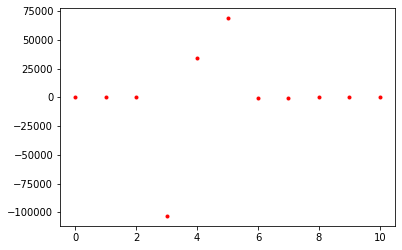

In [ ]:
plt.plot(model.coef_, 'r.')

In [ ]:
df["NEOFAC_A"]

100307    37.0
100408    33.0
101107    28.0
102311    29.0
102513    26.0
          ... 
971160    32.0
973770    28.0
987983    32.0
990366    31.0
995174    27.0
Name: NEOFAC_A, Length: 435, dtype: float64

In [ ]:
np.array([xx.flatten(), yy.flatten()]).T.shape
theta_hat.shape

(12,)

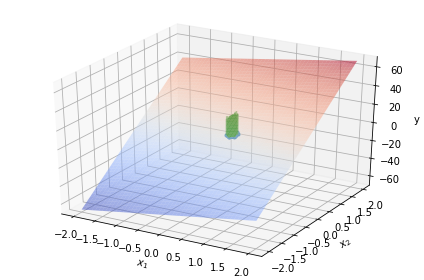

In [ ]:
theta_hat = ordinary_least_squares(Xnew2, y)
xx, yy = np.mgrid[-2:2:50j, -2:2:50j]
y_hat_grid = np.array([xx.flatten(), yy.flatten()]).T @ theta_hat[0:2]
y_hat_grid = y_hat_grid.reshape((50, 50))
ax = plt.subplot(projection='3d')
ax.plot(Xnew2[:, 1], Xnew2[:, 2], y, '.')
ax.plot_surface(xx, yy, y_hat_grid, linewidth=0, alpha=0.5, color='C1',
                cmap=plt.get_cmap('coolwarm'))

for i in range(len(Xnew2)):
  ax.plot((Xnew2[i, 1], Xnew2[i, 1]),
          (Xnew2[i, 2], Xnew2[i, 2]),
          (y[i], y_hat[i]),
          'g-', alpha=.5)

ax.set(
    xlabel='$x_1$',

    ylabel='$x_2$',
    zlabel='y'
)
plt.tight_layout()

## Studying shape features

In [ ]:
shape_labels = fd.columns[fd.columns.tolist().index("span(mm)"):fd.columns.tolist().index('irregularity of end region 2')+1]

In [ ]:
fd["Gender"];

In [ ]:
males = []
females = []
gender = np.array(fd["Gender.1"])
for r in range(len(gender)):
  if gender[r] == 1:
    females.append(fd.index[r])


for r in range(len(gender)):
  if gender[r] == 2:
    males.append(fd.index[r])


maledf = df.loc[males]
femaledf = df.loc[females]

In [ ]:
males;

In [ ]:
maledf = df.loc[males]
femaledf = df.loc[females]

In [ ]:
fd["Gender.1"];

In [ ]:
females;

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    #print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    for s in shape_labels:
      for l in pers_labels:
        x = fd[s]
        idx = np.where(np.isnan(x))
        y = fd[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

In [ ]:
files = np.array(features)[np.array(pval) < 0.0005]
pval.index(min(pval))

4560

In [ ]:
pval[4560]

7.852132837753916e-06

In [ ]:
shape_labels

Index(['span(mm)', 'curl', 'elongation', 'diameter(mm)', 'volume(mm^3)',
       'trunk volume(mm^3)', 'branch volume(mm^3)', 'total surface area(mm^2)',
       'total radius of end regions(mm)', 'total area of end regions(mm^2)',
       'irregularity', 'area of end region 1(mm^2)',
       'radius of end region 1(mm)', 'irregularity of end region 1',
       'area of end region 2(mm^2)', 'radius of end region 2(mm)',
       'irregularity of end region 2'],
      dtype='object')

In [ ]:
files

array([['Cingulum_Frontal_Parietal_R.tsv', 'area of end region 1(mm^2)',
        'NEOFAC_O'],
       ['Corticostriatal_Tract_Anterior_R.tsv', 'trunk volume(mm^3)',
        'NEOFAC_A'],
       ['Corticostriatal_Tract_Posterior_R.tsv',
        'total surface area(mm^2)', 'NEOFAC_O'],
       ['Corticostriatal_Tract_Posterior_R.tsv',
        'area of end region 1(mm^2)', 'NEOFAC_O'],
       ['Corticostriatal_Tract_Superior_R.tsv',
        'area of end region 2(mm^2)', 'NEOFAC_A'],
       ['Inferior_Fronto_Occipital_Fasciculus_L.tsv', 'diameter(mm)',
        'NEOFAC_O'],
       ['Inferior_Fronto_Occipital_Fasciculus_L.tsv', 'volume(mm^3)',
        'NEOFAC_O'],
       ['Inferior_Fronto_Occipital_Fasciculus_L.tsv',
        'trunk volume(mm^3)', 'NEOFAC_O'],
       ['Inferior_Fronto_Occipital_Fasciculus_L.tsv',
        'total surface area(mm^2)', 'NEOFAC_O'],
       ['Inferior_Fronto_Occipital_Fasciculus_L.tsv',
        'total area of end regions(mm^2)', 'NEOFAC_O'],
       ['Inferior_Fronto_O

R2:  2.797357854148619 %
Slope coeff and pvalue:  0.00036210039488648405 0.0004670854531520467


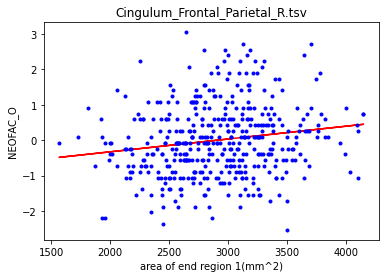

R2:  3.3230172817187653 %
Slope coeff and pvalue:  -2.6482306692536637e-05 0.00013415245271246838


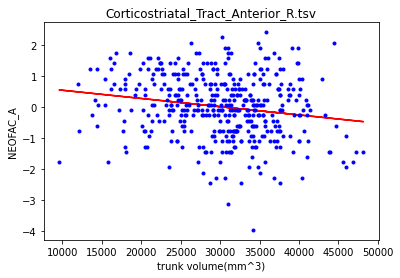

R2:  2.930634000543819 %
Slope coeff and pvalue:  2.844881824281349e-05 0.00034024412426665823


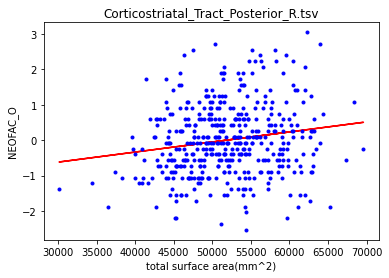

R2:  3.057887634603129 %
Slope coeff and pvalue:  0.0002762283482942333 0.00025151907598574457


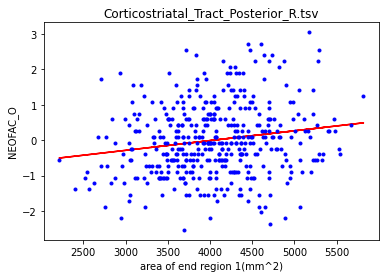

R2:  2.8860424453652667 %
Slope coeff and pvalue:  -0.0002490756320433069 0.0003782764464447873


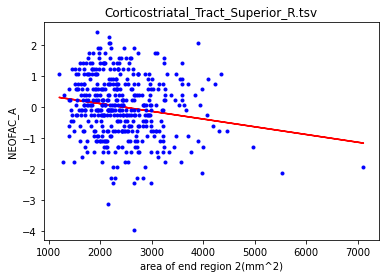

R2:  3.3686779401682077 %
Slope coeff and pvalue:  0.1553028924218618 0.00012040208927474057


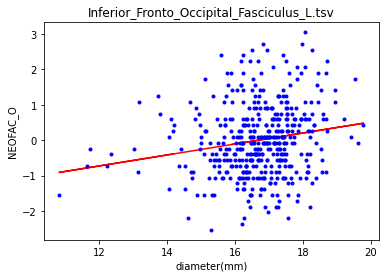

R2:  4.46777284096167 %
Slope coeff and pvalue:  3.539557402762435e-05 8.954223790856861e-06


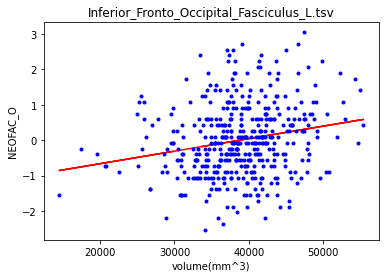

R2:  2.9387564219034545 %
Slope coeff and pvalue:  2.156282067726229e-05 0.00033374168484076274


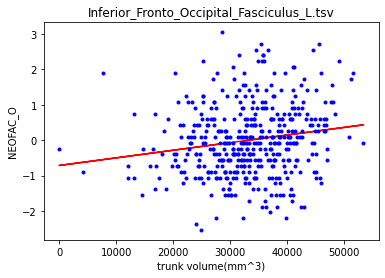

R2:  3.5968284198907963 %
Slope coeff and pvalue:  2.1135283977164124e-05 7.01655290589825e-05


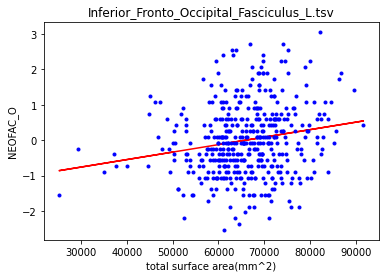

R2:  4.5070803851959385 %
Slope coeff and pvalue:  0.00020787655245697295 8.159801570653703e-06


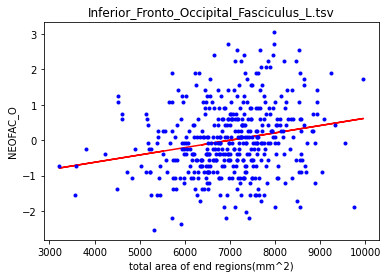

R2:  3.6635734564636424 %
Slope coeff and pvalue:  0.0002676582903896994 5.9918153343652024e-05


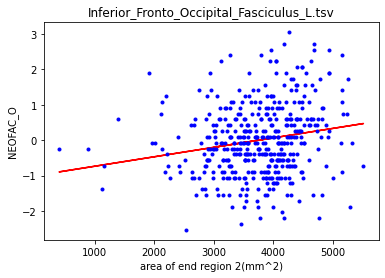

R2:  3.599012704997284 %
Slope coeff and pvalue:  0.0001428114103119563 6.980390188839561e-05


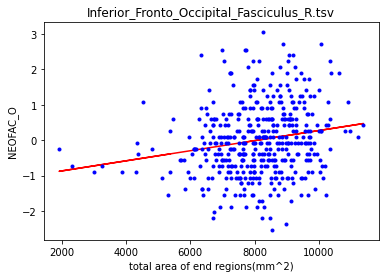

R2:  2.9125715375071914 %
Slope coeff and pvalue:  0.00016985860418915007 0.00035516379632125565


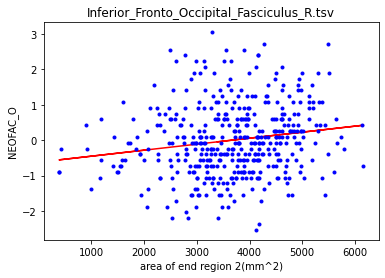

R2:  2.798275748897283 %
Slope coeff and pvalue:  0.15187919481291332 0.0004660665612021015


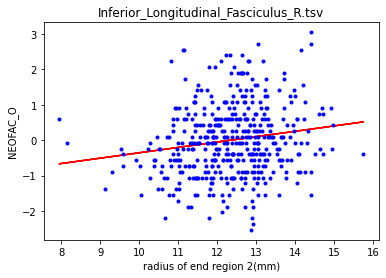

R2:  3.4011647523118804 %
Slope coeff and pvalue:  -0.5399170701112666 0.00011148758119024735


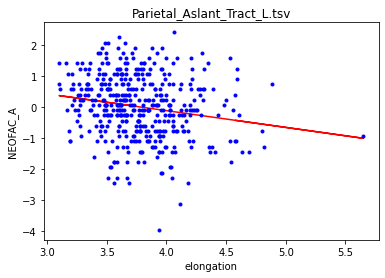

R2:  2.7717462049611785 %
Slope coeff and pvalue:  0.1445051498919295 0.0004964358801835704


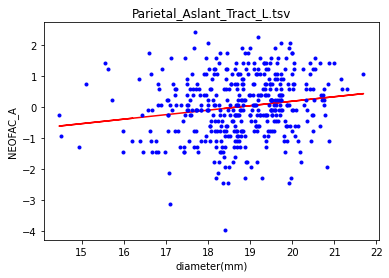

R2:  3.1765152843450273 %
Slope coeff and pvalue:  0.051906737000952774 0.00018983294013751216


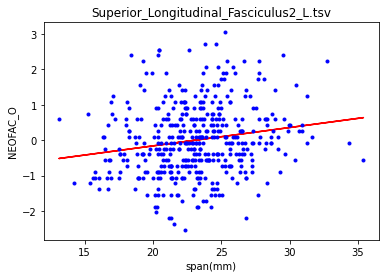

R2:  3.067230193123971 %
Slope coeff and pvalue:  0.00018712306856056044 0.0002460044415640032


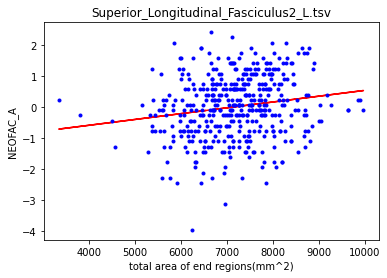

R2:  4.523341242489531 %
Slope coeff and pvalue:  0.000359789007039544 7.852132837754079e-06


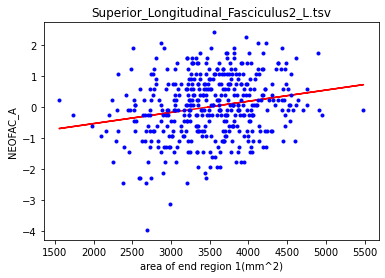

R2:  2.812265082212684 %
Slope coeff and pvalue:  0.00028369151133164725 0.00045081147943683953


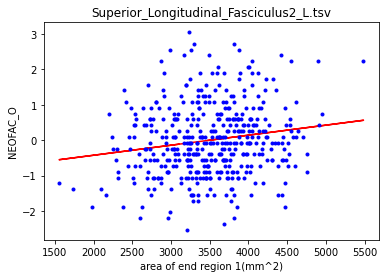

In [ ]:
for r in range(len(files)):
  f = files[r][0]
  s = files[r][1]
  l = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = fd[s]
  y = fd[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  #x = (x- np.mean(x))/np.std(x) # z-score
  #y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()

In [ ]:

for r in range(len(files)):
  print('Tract', files[r][0])
  for t in pers_labels:
    f = files[r][0]
    fd = pd.read_csv(f, sep =  '\t', index_col = 0)
    col = shape_labels.tolist() + ["Gender.1"] + ["Age_in_Yrs"] 
    X = fd[col]
    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))
    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))

    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])

    Xnew2 = sm2.add_constant(Xnew)
    model.fit(Xnew,y)
    theta_hat = ordinary_least_squares(Xnew2, y)

    y_hat = Xnew2 @ theta_hat
    # Compute MSE
    
    print('Personality tract:', t)
    print(model.score(Xnew,y)*100)
    print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 
    plt.figure()
    plt.title('Personality tract: %s - Fiber %s' %(t,f))
    plt.plot(model.coef_, 'r.')
    plt.xticks(np.arange(0,len(col),1), labels = col)

In [ ]:
shape_labels[-14:]

Index(['diameter(mm)', 'volume(mm^3)', 'trunk volume(mm^3)',
       'branch volume(mm^3)', 'total surface area(mm^2)',
       'total radius of end regions(mm)', 'total area of end regions(mm^2)',
       'irregularity', 'area of end region 1(mm^2)',
       'radius of end region 1(mm)', 'irregularity of end region 1',
       'area of end region 2(mm^2)', 'radius of end region 2(mm)',
       'irregularity of end region 2'],
      dtype='object')

In [ ]:
'branch volume(mm^3)' ,'irregularity of end region 1', 'irregularity'

In [ ]:
theta_hat

array([ 7.45333178e+04, -4.80295499e+02, -2.58307958e+03, -3.67659348e+03,
       -2.85023027e+03,  2.58984375e+01, -2.51835938e+01, -2.51796875e+01,
        2.70428717e-02, -6.56037354e+03,  5.50820312e+01, -1.62404893e+02,
       -5.50898438e+01,  6.56093799e+03, -1.64060192e+01, -5.50859375e+01,
        6.56033154e+03,  2.62415712e+01,  2.81999387e-01,  7.54987504e-02])

## Females

In [ ]:
males = []
females = []
gender = np.array(fd["Gender.1"])
for r in range(len(gender)):
  if gender[r] == 1:
    females.append(fd.index[r])


for r in range(len(gender)):
  if gender[r] == 2:
    males.append(fd.index[r])


maledf = df.loc[males]
femaledf = df.loc[females]

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    males = []
    females = []  
    gender = np.array(fd["Gender.1"])
    for r in range(len(gender)):
      if gender[r] == 1:
        females.append(fd.index[r])


    #for r in range(len(gender)):
     # if gender[r] == 2:
      #  males.append(fd.index[r])


    #maledf = df.loc[males]
    femaledf = df.loc[females]
    for s in diff_labels:
      for l in pers_labels:
        x = femaledf[s]
        idx = np.where(np.isnan(x))
        y = femaledf[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

Arcuate_Fasciculus_L.tsv
Arcuate_Fasciculus_R.tsv
Cingulum_Frontal_Parahippocampal_L.tsv
Cingulum_Frontal_Parahippocampal_R.tsv
Cingulum_Frontal_Parietal_L.tsv
Cingulum_Frontal_Parietal_R.tsv
Cingulum_Parahippocampal_L.tsv
Cingulum_Parahippocampal_Parietal_L.tsv
Cingulum_Parahippocampal_Parietal_R.tsv
Cingulum_Parahippocampal_R.tsv
Cingulum_Rarolfactory_L.tsv
Cingulum_Rarolfactory_R.tsv
Corpus_Callosum_Body.tsv
Corpus_Callosum_Forceps_Major.tsv
Corpus_Callosum_Forceps_Minor.tsv
Corpus_Callosum_Tapetum.tsv
Corticobulbar_Tract_L.tsv
Corticopontine_Tract_Frontal_L.tsv
Corticopontine_Tract_Frontal_R.tsv
Corticopontine_Tract_Occipital_L.tsv
Corticopontine_Tract_Occipital_R.tsv
Corticopontine_Tract_Parietal_L.tsv
Corticopontine_Tract_Parietal_R.tsv
Corticospinal_Tract_L.tsv
Corticospinal_Tract_R.tsv
Corticostriatal_Tract_Anterior_L.tsv
Corticostriatal_Tract_Anterior_R.tsv
Corticostriatal_Tract_Posterior_L.tsv
Corticostriatal_Tract_Posterior_R.tsv
Corticostriatal_Tract_Superior_L.tsv
Corticos

In [ ]:
files = np.array(features)[np.array(pval) < 0.005]
files

array([], shape=(0, 3), dtype='<U42')

In [ ]:
len(pval)
pval.index(min(pval))

5695

In [ ]:
files

array([], shape=(0, 3), dtype='<U42')

In [ ]:
pval[1730]

0.008381164446976475

In [ ]:
features[1730]

['Corticopontine_Tract_Occipital_R.tsv', 'branch volume(mm^3)', 'NEOFAC_A']

In [ ]:
files;

In [ ]:
for r in range(len(files)):
  f = files[r][0]
  s = files[r][1]
  l = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = fd[s]
  y = fd[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist() + idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  #x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()

In [ ]:

for r in range(len(files)):
  print('Tract', files[r][0])
  for t in pers_labels:
    f = files[r][0]
    fd = pd.read_csv(f, sep =  '\t', index_col = 0)
    col = shape_labels.tolist() + ["Gender.1"] + ["Age_in_Yrs"] 
    X = fd[col]
    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))
    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))

    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])

    Xnew2 = sm2.add_constant(Xnew)
    model.fit(Xnew,y)
    theta_hat = ordinary_least_squares(Xnew2, y)

    y_hat = Xnew2 @ theta_hat
    # Compute MSE
    
    print('Personality tract:', t)
    print(model.score(Xnew,y)*100)
    print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 
    plt.figure()
    plt.title('Personality tract: %s - Fiber %s' %(t,f))
    plt.plot(model.coef_, 'r.')
    plt.xticks(np.arange(0,len(col),1), labels = col)

In [ ]:
shape_labels[-14:]

Index(['diameter(mm)', 'volume(mm^3)', 'trunk volume(mm^3)',
       'branch volume(mm^3)', 'total surface area(mm^2)',
       'total radius of end regions(mm)', 'total area of end regions(mm^2)',
       'irregularity', 'area of end region 1(mm^2)',
       'radius of end region 1(mm)', 'irregularity of end region 1',
       'area of end region 2(mm^2)', 'radius of end region 2(mm)',
       'irregularity of end region 2'],
      dtype='object')

In [ ]:
'branch volume(mm^3)' ,'irregularity of end region 1', 'irregularity'

In [ ]:
theta_hat

array([ 7.45333178e+04, -4.80295499e+02, -2.58307958e+03, -3.67659348e+03,
       -2.85023027e+03,  2.58984375e+01, -2.51835938e+01, -2.51796875e+01,
        2.70428717e-02, -6.56037354e+03,  5.50820312e+01, -1.62404893e+02,
       -5.50898438e+01,  6.56093799e+03, -1.64060192e+01, -5.50859375e+01,
        6.56033154e+03,  2.62415712e+01,  2.81999387e-01,  7.54987504e-02])

## Males

In [ ]:
np.array(df).shape

(435, 618)

In [ ]:
np.array(maledf).shape

(192, 618)

In [ ]:
len(femaledf)

243

In [ ]:
pval = []
features = []
coef = []
intercept = []
xs = []
for file in sorted(os.listdir()):
  if "tsv" in file:
    print(file)
    fd = pd.read_csv(file, sep =  '\t', index_col = 0)
    males = []
    females = []  
    gender = np.array(fd["Gender.1"])
    #for r in range(len(gender)):
      #if gender[r] == 1:
        #females.append(fd.index[r])


    for r in range(len(gender)):
      if gender[r] == 2:
        males.append(fd.index[r])


    maledf = df.loc[males]
    #femaledf = df.loc[females]
    for s in diff_labels:
      for l in pers_labels:
        x = maledf[s]
        idx = np.where(np.isnan(x))
        y = maledf[l]
        idx2 = np.where(np.isnan(y)) 
        x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
        y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
        x2 = sm2.add_constant(x)
        ls = sm.OLS(y, x2).fit()
        pval.append(ls.pvalues[1])
        coef.append(ls.params[1])
        intercept.append(ls.params[0])
        xs.append(x)
        features.append([file,s,l])

Arcuate_Fasciculus_L.tsv
Arcuate_Fasciculus_R.tsv
Cingulum_Frontal_Parahippocampal_L.tsv
Cingulum_Frontal_Parahippocampal_R.tsv
Cingulum_Frontal_Parietal_L.tsv
Cingulum_Frontal_Parietal_R.tsv
Cingulum_Parahippocampal_L.tsv
Cingulum_Parahippocampal_Parietal_L.tsv
Cingulum_Parahippocampal_Parietal_R.tsv
Cingulum_Parahippocampal_R.tsv
Cingulum_Rarolfactory_L.tsv
Cingulum_Rarolfactory_R.tsv
Corpus_Callosum_Body.tsv
Corpus_Callosum_Forceps_Major.tsv
Corpus_Callosum_Forceps_Minor.tsv
Corpus_Callosum_Tapetum.tsv
Corticobulbar_Tract_L.tsv
Corticopontine_Tract_Frontal_L.tsv
Corticopontine_Tract_Frontal_R.tsv
Corticopontine_Tract_Occipital_L.tsv
Corticopontine_Tract_Occipital_R.tsv
Corticopontine_Tract_Parietal_L.tsv
Corticopontine_Tract_Parietal_R.tsv
Corticospinal_Tract_L.tsv
Corticospinal_Tract_R.tsv
Corticostriatal_Tract_Anterior_L.tsv
Corticostriatal_Tract_Anterior_R.tsv
Corticostriatal_Tract_Posterior_L.tsv
Corticostriatal_Tract_Posterior_R.tsv
Corticostriatal_Tract_Superior_L.tsv
Corticos

In [ ]:
files = np.array(features)[np.array(pval) < 0.005]
pval.index(min(pval))

703

In [ ]:
files

array([], shape=(0, 3), dtype='<U42')

In [ ]:
files

array([], shape=(0, 3), dtype='<U42')

In [ ]:
pval[2862]

0.007279685796322832

In [ ]:
features[1730]

['Corticopontine_Tract_Occipital_R.tsv', 'branch volume(mm^3)', 'NEOFAC_A']

In [ ]:
files;

In [ ]:
for r in range(len(files)):
  f = files[r][0]
  s = files[r][1]
  l = files[r][2]
  fd = pd.read_csv(f, sep =  '\t', index_col = 0)
  x = fd[s]
  y = fd[l] 
  idx = np.where(np.isnan(x))
  idx2 = np.where(np.isnan(y))
  y = np.delete(np.array(y),idx2[0].tolist()+ idx[0].tolist())
  x = np.delete(np.array(x),idx2[0].tolist()+ idx[0].tolist())
  #x = np.delete(np.array(x),13) # outlier in Cingulum_Parahippocampal_R case
  #y = np.delete(np.array(y),13) #outlier in Cingulum_Parahippocampal_R case
  #x = (x- np.mean(x))/np.std(x) # z-score
  y = (y- np.mean(y))/np.std(y) # z-score
  x2 = sm2.add_constant(x)
  ls = sm.OLS(y, x2).fit()
  print('R2: ', r2_score(y,ls.params[0] + ls.params[1]*x)*100, '%')
  plt.figure()
  plt.plot(x, ls.params[0] + ls.params[1]*x, 'r-')
  
  print('Slope coeff and pvalue: ',ls.params[1], ls.pvalues[1])
  ls.summary()
  plt.title(f)
  plt.plot(x,y, 'b.')
  plt.ylabel(l)
  plt.xlabel(s)
  plt.show()

In [ ]:

for r in range(len(files)):
  print('Tract', files[r][0])
  for t in pers_labels:
    f = files[r][0]
    fd = pd.read_csv(f, sep =  '\t', index_col = 0)
    col = shape_labels.tolist() + ["Gender.1"] + ["Age_in_Yrs"] 
    X = fd[col]
    y = fd[t]

    model = LinearRegression()
    idx2 = np.where(np.isnan(y))
    y = np.array(y)
    y = np.delete(y,idx2[0])

    X = np.array(X)
    Xnew = np.empty((X.shape[0]-1,X.shape[1]))

    for l in range(len(X[0])):
      Xnew[:,l] = np.delete(X[:,l], idx2[0])

    Xnew2 = sm2.add_constant(Xnew)
    model.fit(Xnew,y)
    theta_hat = ordinary_least_squares(Xnew2, y)

    y_hat = Xnew2 @ theta_hat
    # Compute MSE
    
    print('Personality tract:', t)
    print(model.score(Xnew,y)*100)
    print(f"MSE = {np.mean((y - y_hat)**2):.2f}") 
    plt.figure()
    plt.title('Personality tract: %s - Fiber %s' %(t,f))
    plt.plot(model.coef_, 'r.')
    plt.xticks(np.arange(0,len(col),1), labels = col)

In [ ]:
shape_labels[-14:]

Index(['diameter(mm)', 'volume(mm^3)', 'trunk volume(mm^3)',
       'branch volume(mm^3)', 'total surface area(mm^2)',
       'total radius of end regions(mm)', 'total area of end regions(mm^2)',
       'irregularity', 'area of end region 1(mm^2)',
       'radius of end region 1(mm)', 'irregularity of end region 1',
       'area of end region 2(mm^2)', 'radius of end region 2(mm)',
       'irregularity of end region 2'],
      dtype='object')

In [ ]:
'branch volume(mm^3)' ,'irregularity of end region 1', 'irregularity'

In [ ]:
theta_hat

array([ 7.45333178e+04, -4.80295499e+02, -2.58307958e+03, -3.67659348e+03,
       -2.85023027e+03,  2.58984375e+01, -2.51835938e+01, -2.51796875e+01,
        2.70428717e-02, -6.56037354e+03,  5.50820312e+01, -1.62404893e+02,
       -5.50898438e+01,  6.56093799e+03, -1.64060192e+01, -5.50859375e+01,
        6.56033154e+03,  2.62415712e+01,  2.81999387e-01,  7.54987504e-02])